In [1]:
# Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Additional Queries for Delivarable #3

In [4]:
prec_june = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
prec_june = list(np.ravel(prec_june))
df_prec_june = pd.DataFrame(prec_june, columns=['June Precipitation'])
df_prec_june.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


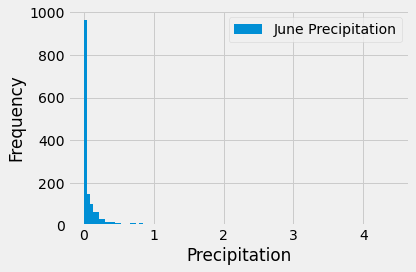

In [5]:

df_prec_june.plot.hist(bins=100).set_xlabel('Precipitation')
plt.tight_layout()

In [6]:
prec_dec = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
prec_dec = list(np.ravel(prec_dec))
df_prec_dec = pd.DataFrame(prec_dec, columns=['December Precipitation'])
df_prec_dec.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


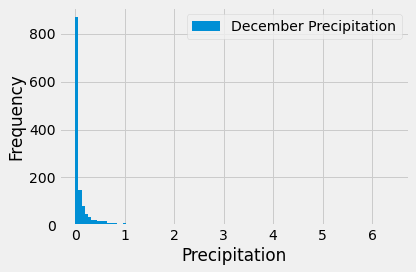

In [7]:
df_prec_dec.plot.hist(bins=100).set_xlabel('Precipitation')
plt.tight_layout()